# Predict whether the Employee of an Organization should get Promotion or Not?

Your client is a large MNC and they have 15 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is: * They first identify a set of employees based on recommendations/ past performance. * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical * At the end of the program, based on various factors such as training performance, an employee gets the promotion.

## <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
train.shape

(54808, 14)

In [7]:
test.shape

(23490, 13)

In [8]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [11]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

# Descriptive statistics

In [12]:
train.describe() # -> left / leave / Rare working in the same company -> 37 ( Outliers )

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [13]:
train.describe(include = 'object') 

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


C:\Users\surol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


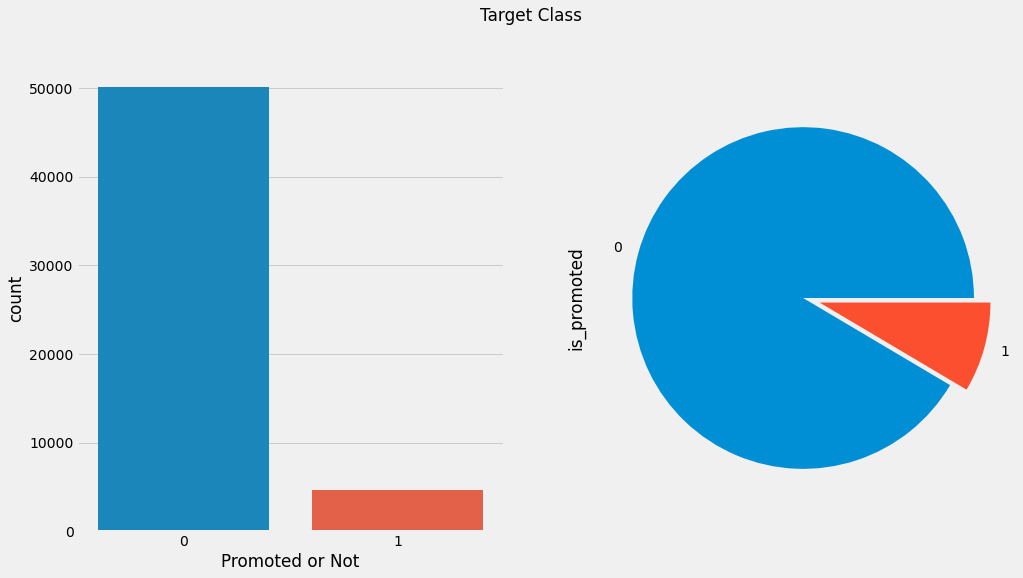

In [14]:
# Plotting -> Traget -> 0 and 1

# Count plot -> pie Chart

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'])
plt.xlabel("Promoted or Not")

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], labels = ['0', '1'])
plt.suptitle("Target Class")
plt.show()



In [15]:
#We need to handle imbalanced data first.

In [16]:
# Missing values imputation

train_total = train.isnull().sum()

train_precent = ((train.isnull().sum() / train.shape[0])*100).round(2)
train_precent

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [17]:
test_total = test.isnull().sum()

test_precent = ((test.isnull().sum() / test.shape[0])*100).round(2)
test_precent

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.71
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
dtype: float64

In [18]:
train.head() # -> 1,2,3,4,5 ->mode()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [19]:
train['education'] = train['education'].fillna(train['education'].mode()[0])

train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

In [20]:

train_total = train.isnull().sum()

train_precent = ((train.isnull().sum() / train.shape[0])*100).round(2)
train_precent

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [21]:
test['education'] = test['education'].fillna(test['education'].mode()[0])

test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

In [22]:
test_total = test.isnull().sum()

test_precent = ((test.isnull().sum() / test.shape[0])*100).round(2)
test_precent

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
dtype: float64

In [23]:
# Outliers Handling -> numerical Data

train.select_dtypes('number').head()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


C:\Users\surol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


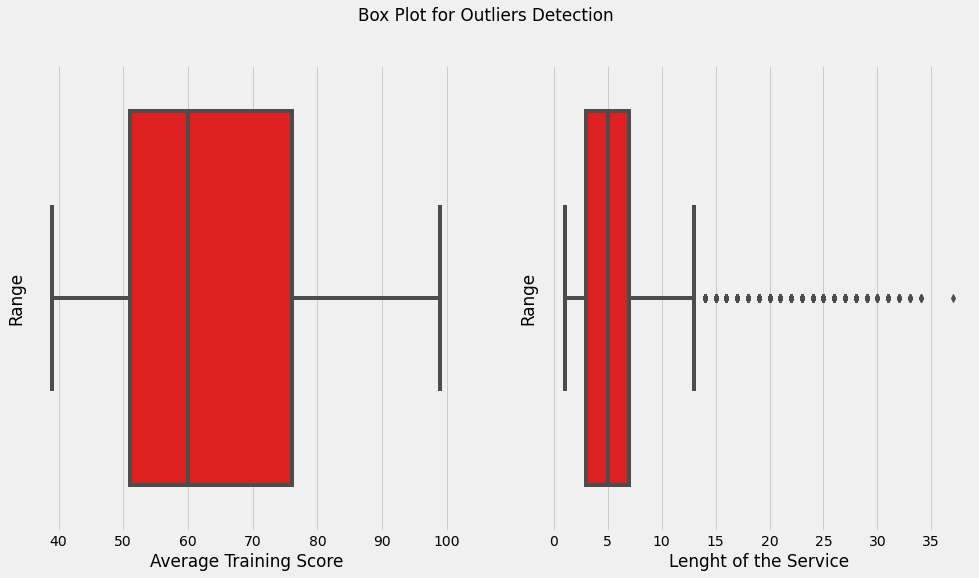

In [24]:
plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel("Average Training Score")
plt.ylabel("Range")


plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel("Lenght of the Service")
plt.ylabel("Range")
plt.suptitle("Box Plot for Outliers Detection")
plt.show()

In [25]:
train.shape

(54808, 14)

In [26]:
# Remove the outliers from the length of the serive columns

train = train[train['length_of_service'] < 13]

C:\Users\surol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


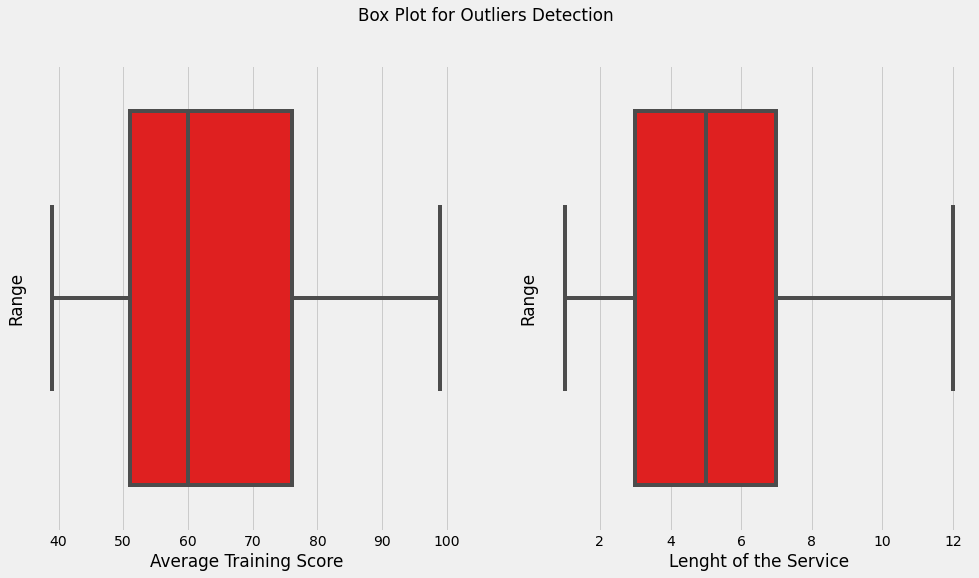

In [27]:
plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel("Average Training Score")
plt.ylabel("Range")


plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel("Lenght of the Service")
plt.ylabel("Range")
plt.suptitle("Box Plot for Outliers Detection")
plt.show()

# Univariate Analysis
# Bivariate Analysis
# Mutivariate Analysis
# Feature Engineering
# Modeul Building and Prediction

Text(0.5, 1.0, 'awards_won?')

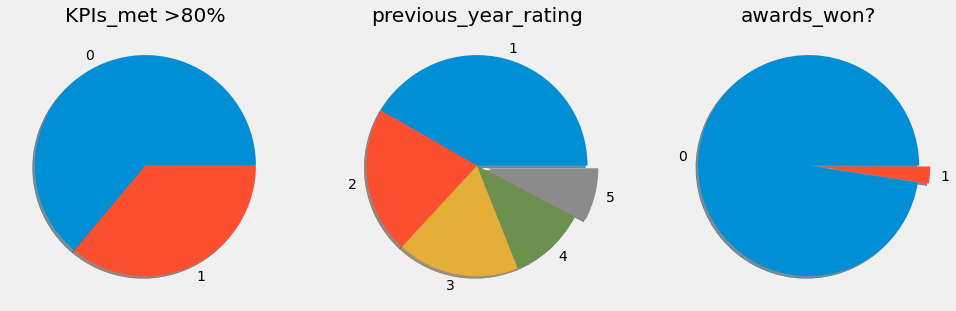

In [28]:
# awards_won , KPIs_met >80 , previous_year_rating -> Pic chart

# first columns: KPIs_met >80 
plt.subplot(1, 3, 1)
labels = ['0', '1']
explode = [0,0]
size = train['KPIs_met >80%'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True )
plt.title("KPIs_met >80%")

# Second Columns: previous_year_rating

plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
explode = [0,0,0,0,0.1]
size = train['previous_year_rating'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True )
plt.title("previous_year_rating")

# Thirs Columns: awards_won
plt.subplot(1, 3, 3)
labels = ['0', '1']
explode = [0,0.1]
size = train['awards_won?'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True )
plt.title("awards_won?")

C:\Users\surol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


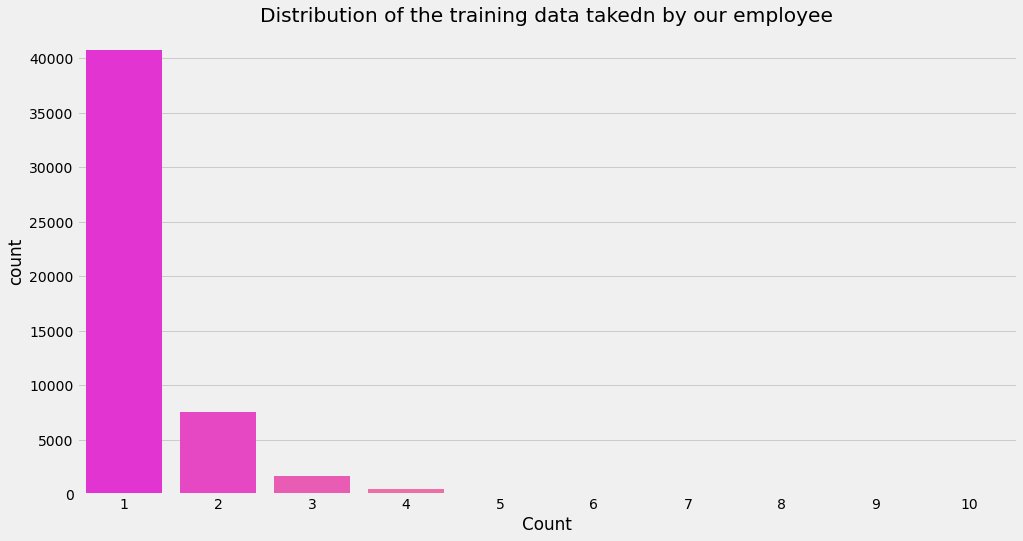

In [29]:
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel("Count")
plt.title("Distribution of the training data takedn by our employee")
plt.show()

In [30]:
train['no_of_trainings'].value_counts()

1     40744
2      7556
3      1696
4       450
5       122
6        39
7        11
8         5
9         5
10        4
Name: no_of_trainings, dtype: int64

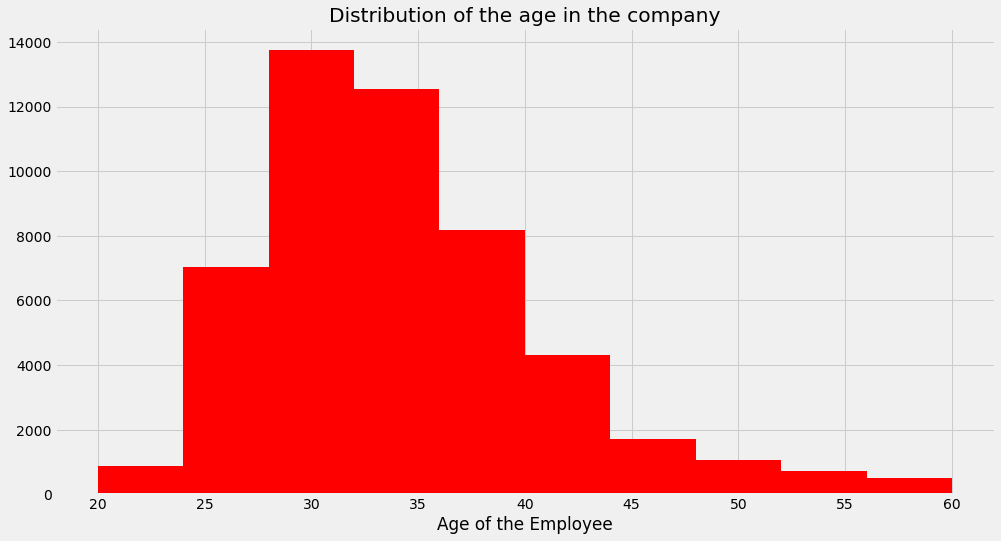

In [31]:
plt.hist(train['age'], color = 'red')
plt.title("Distribution of the age in the company")
plt.xlabel("Age of the Employee")
plt.show()

Text(0.5, 1.0, 'recruitment_channel')

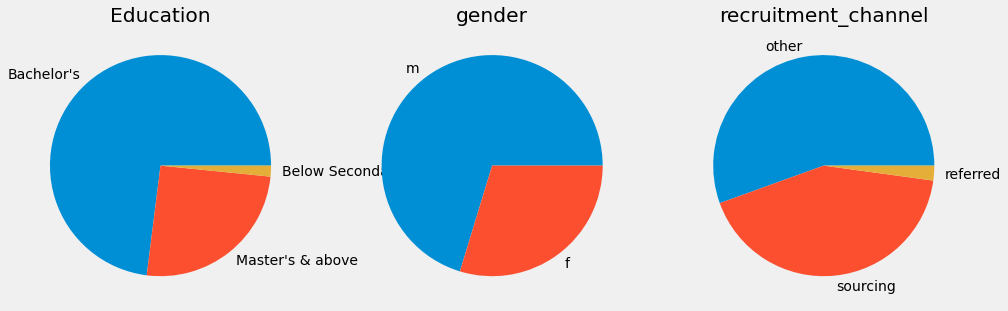

In [32]:
# education	gender	recruitment_channel

# Education
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
size = train['education'].value_counts()
explode = None

plt.pie(size, labels = labels, explode = explode)
plt.title("Education")

#gender
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
size = train['gender'].value_counts()
explode = None
plt.pie(size, labels = labels, explode = explode)
plt.title("gender")

plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
size = train['recruitment_channel'].value_counts()
explode = None
plt.pie(size, labels = labels, explode = explode)
plt.title("recruitment_channel")

# Bivariate Analysis
- C & C
- C & N
- N & N

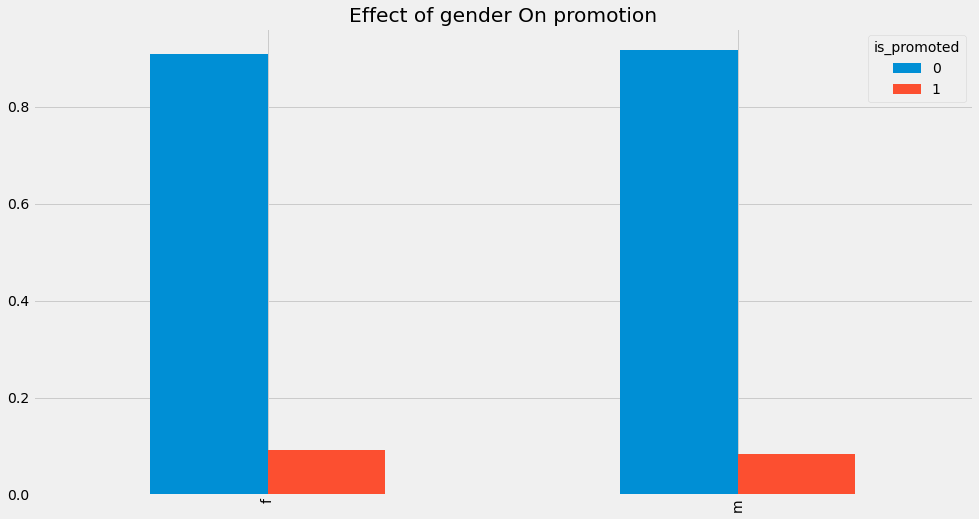

In [33]:
# Gnerder and Promption
x = pd.crosstab(train['gender'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title("Effect of gender On promotion")
plt.xlabel("")
plt.show()

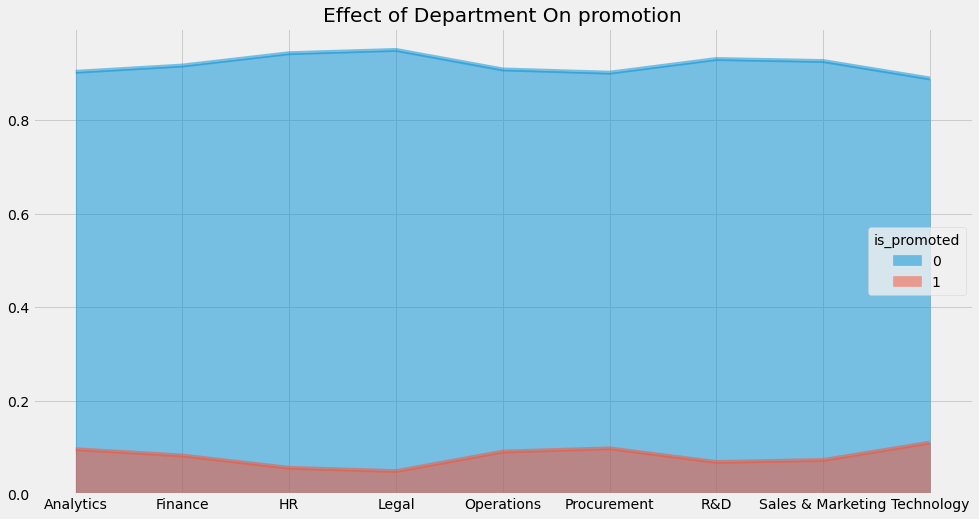

In [34]:
# Departmenet and promotion
x = pd.crosstab(train['department'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title("Effect of Department On promotion")
plt.xlabel("")
plt.show()

C:\Users\surol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


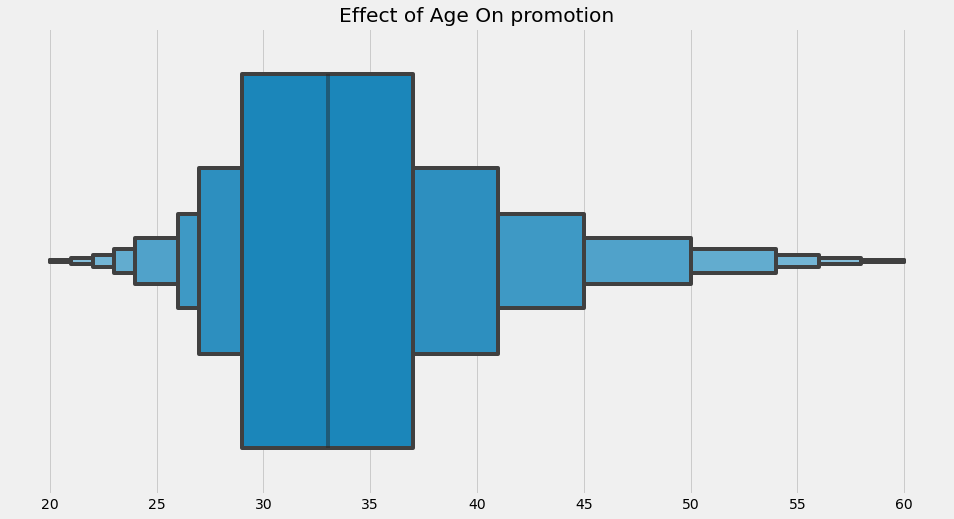

In [35]:
sns.boxenplot(train['age'])
plt.title("Effect of Age On promotion")
plt.xlabel("")
plt.show()

# multivariate Analysis


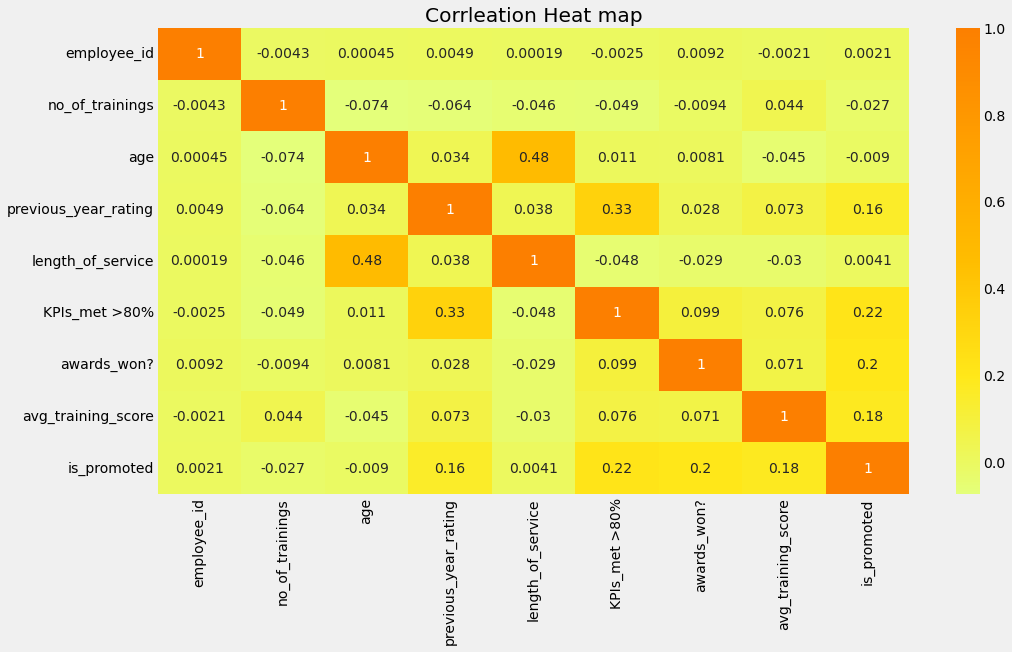

In [36]:
# multivariate Analysis
sns.heatmap(train.corr(), annot = True, cmap = 'Wistia')
plt.title("Corrleation Heat map")
plt.show()

# Feature engineering

In [37]:
# Create a metric of sum
train['sum_metric'] = train['awards_won?'] + train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?'] + test['KPIs_met >80%'] + test['previous_year_rating']

# Create a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [38]:
# Removing unnecessary columns

train = train.drop(['employee_id', 'region', 'recruitment_channel'], axis = 1)
test = test.drop(['employee_id', 'region', 'recruitment_channel'], axis = 1)

print(train.columns)
print(test.columns)

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')
Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'sum_metric', 'total_score'],
      dtype='object')


In [39]:
# no award winner, No KPIs_met >80%, previous year rating = 1, avg_training score < 60

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
     (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [40]:
train.shape

(50632, 13)

In [41]:
train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

In [42]:
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [43]:
train['education'].value_counts()

Bachelor's          36963
Master's & above    12862
Below Secondary       805
Name: education, dtype: int64

In [44]:
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()

In [47]:
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])

train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

In [48]:
# Splitting the data
y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

In [49]:
x_test.shape

(23490, 12)

In [50]:
!pip install imbalanced-learn


In [51]:
# handling Imblanced data

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(x,y)

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)

(74003, 12)
(74003,)
(18501, 12)
(18501,)
(23490, 12)


In [54]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)
x_test = sc.transform(x_test)

In [55]:
# Model Building

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

In [56]:
print("Traiinig Acc.: ", model.score(x_train, y_train))
print("Testing Acc.: ", model.score(x_valid, y_train))

Traiinig Acc.:  0.9898787886977555


ValueError: Found input variables with inconsistent numbers of samples: [74003, 18501]

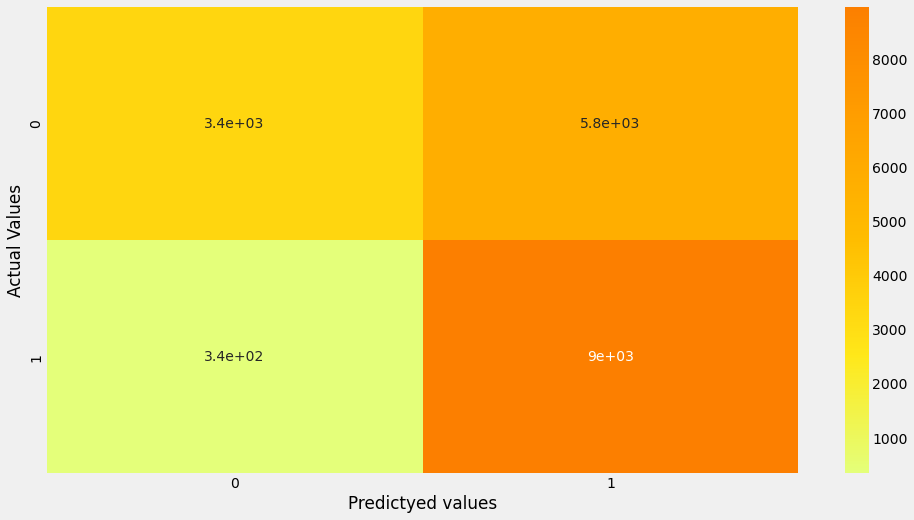

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.xlabel("Predictyed values")
plt.ylabel("Actual Values")
plt.show()


In [58]:
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.37      0.53      9187
           1       0.61      0.96      0.75      9314

    accuracy                           0.67     18501
   macro avg       0.76      0.67      0.64     18501
weighted avg       0.76      0.67      0.64     18501



In [59]:
prediction = model.predict(np.array([[2,
                                    3,
                                    1,
                                    1,
                                    30,
                                    5,
                                    10, 
                                    1,
                                    1,
                                    95,
                                    7,
                                    700]]))

print(" Whether the employee should get promoted or not", prediction)

 Whether the employee should get promoted or not [1]
